# ZhiHeng Zhang

## Research question/interests

This notebook focuses on comparing the number of past players, current players and all the players that have attended the Apex Legend e-sport competition group by nationality and team, compare the income of different groups. The final result of this notebook should show: 1) If there is a connection between team player amount and the team earning ranking? 2) How much percent is a team's earning comparing to the total earning of all teams each year?(totally 4 different charts for 2019-2022)

# Task 1 EDA
Split data into several smaller tables by year so it will be easier to compare data within the same year

In [3]:
import pandas as pd
#player_info = pd.read_csv("ungraded/--playerinfo.csv")
player_info = pd.read_csv("ungraded/player__info__base.csv")
win_by_player=pd.read_csv("ungraded/winnings_by_player_allYears.csv")

Split up earnings of different teams by year

In [4]:
win_by_org = pd.read_csv("ungraded/winnings_by_org_allYears.csv")
win2019 = win_by_org[win_by_org["year"]==2019]
win2020 = win_by_org[win_by_org["year"]==2020]
win2021 = win_by_org[win_by_org["year"]==2021]
win2022 = win_by_org[win_by_org["year"]==2022]
print("2019 chart:")
win2019

2019 chart:


,earnings_rank,team,earnings,year
0,1,TSM,210917,2019
1,2,Sentinels,171194,2019
2,3,NRG,151158,2019
3,4,Rogue,133252,2019
4,5,Natus Vincere,111177,2019
...,...,...,...,...
106,107,YMCA Esports Red,26,2019
107,108,Lazarus,23,2019
108,109,Triumph,21,2019
109,110,Kingsmen,20,2019


In [5]:
print("2020 chart:")
win2020

2020 chart:


,earnings_rank,team,earnings,year
111,1,Complexity Gaming,96700,2020
112,2,TSM,94195,2020
113,3,Alliance,77375,2020
114,4,North,61340,2020
115,5,Counter Logic Gaming,57460,2020
...,...,...,...,...
277,164,INZE ESPORTS,150,2020
278,164,Invictus Gaming Lightning,150,2020
279,169,Absolute Monarchy,60,2020
280,169,Obey Alliance,60,2020


In [6]:
print("2021 chart:")
win2021

2021 chart:


,earnings_rank,team,earnings,year
282,1,SCARZ Europe,271473,2021
283,2,Kungarna NA,266821,2021
284,3,WOLFPACK ARCTIC,204486,2021
285,4,FENNEL Korea,184367,2021
286,5,TSM,167448,2021
...,...,...,...,...
510,229,Perangai Esport 2,51,2021
511,230,C-VA KAGOSHIMA,45,2021
512,231,Team Nerf,40,2021
513,232,Redragon,35,2021


In [7]:
print("2022 chart:")
win2022

2022 chart:


,earnings_rank,team,earnings,year
515,1,TSM,103700,2022
516,2,NEW Esports,100371,2022
517,3,Riddle,100000,2022
518,4,NRG,61847,2022
519,5,Alliance,60333,2022
...,...,...,...,...
623,109,Built By Gamers,100,2022
624,109,NXL WOLFPACK,100,2022
625,111,ANT Esports Club,76,2022
626,112,Game of Drones,50,2022


Have a look at 2019 earnings of different teams

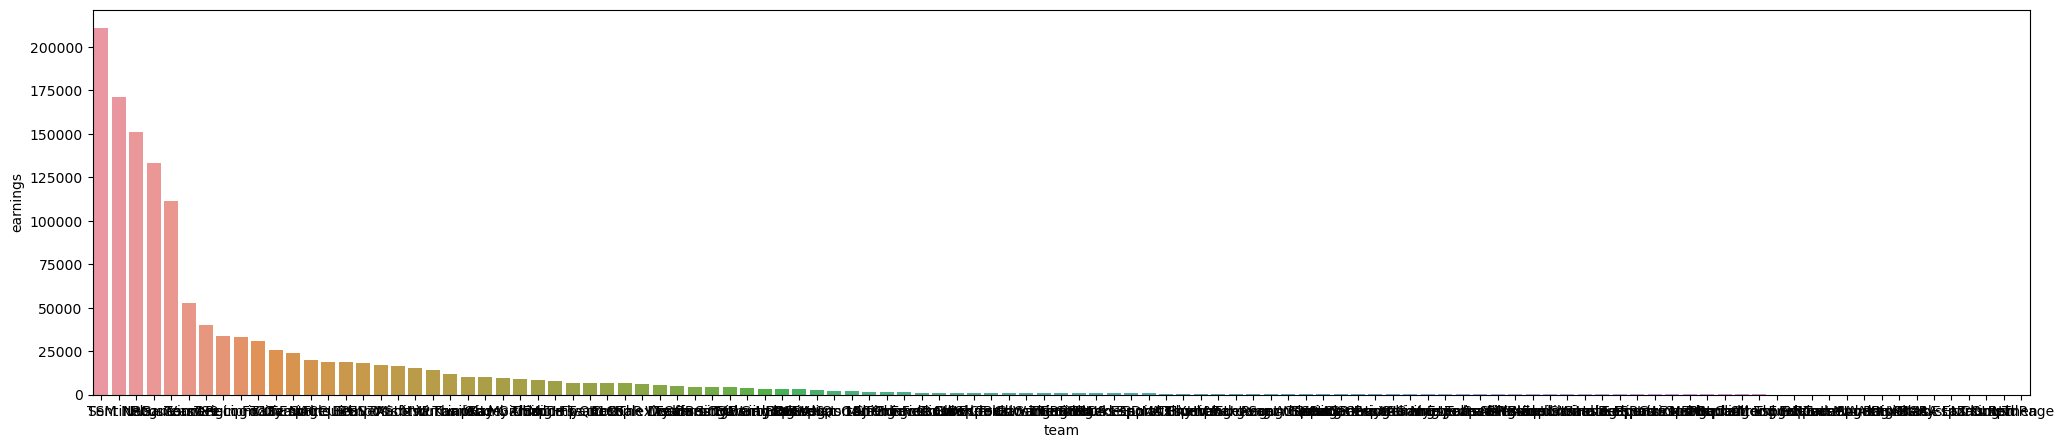

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(y=win2019["earnings"],x=win2019["team"])
plt.gcf().set_size_inches(25, 5)

There are too many teams, the chart is too crowded with 111 records,focus on the highest 20 teams only

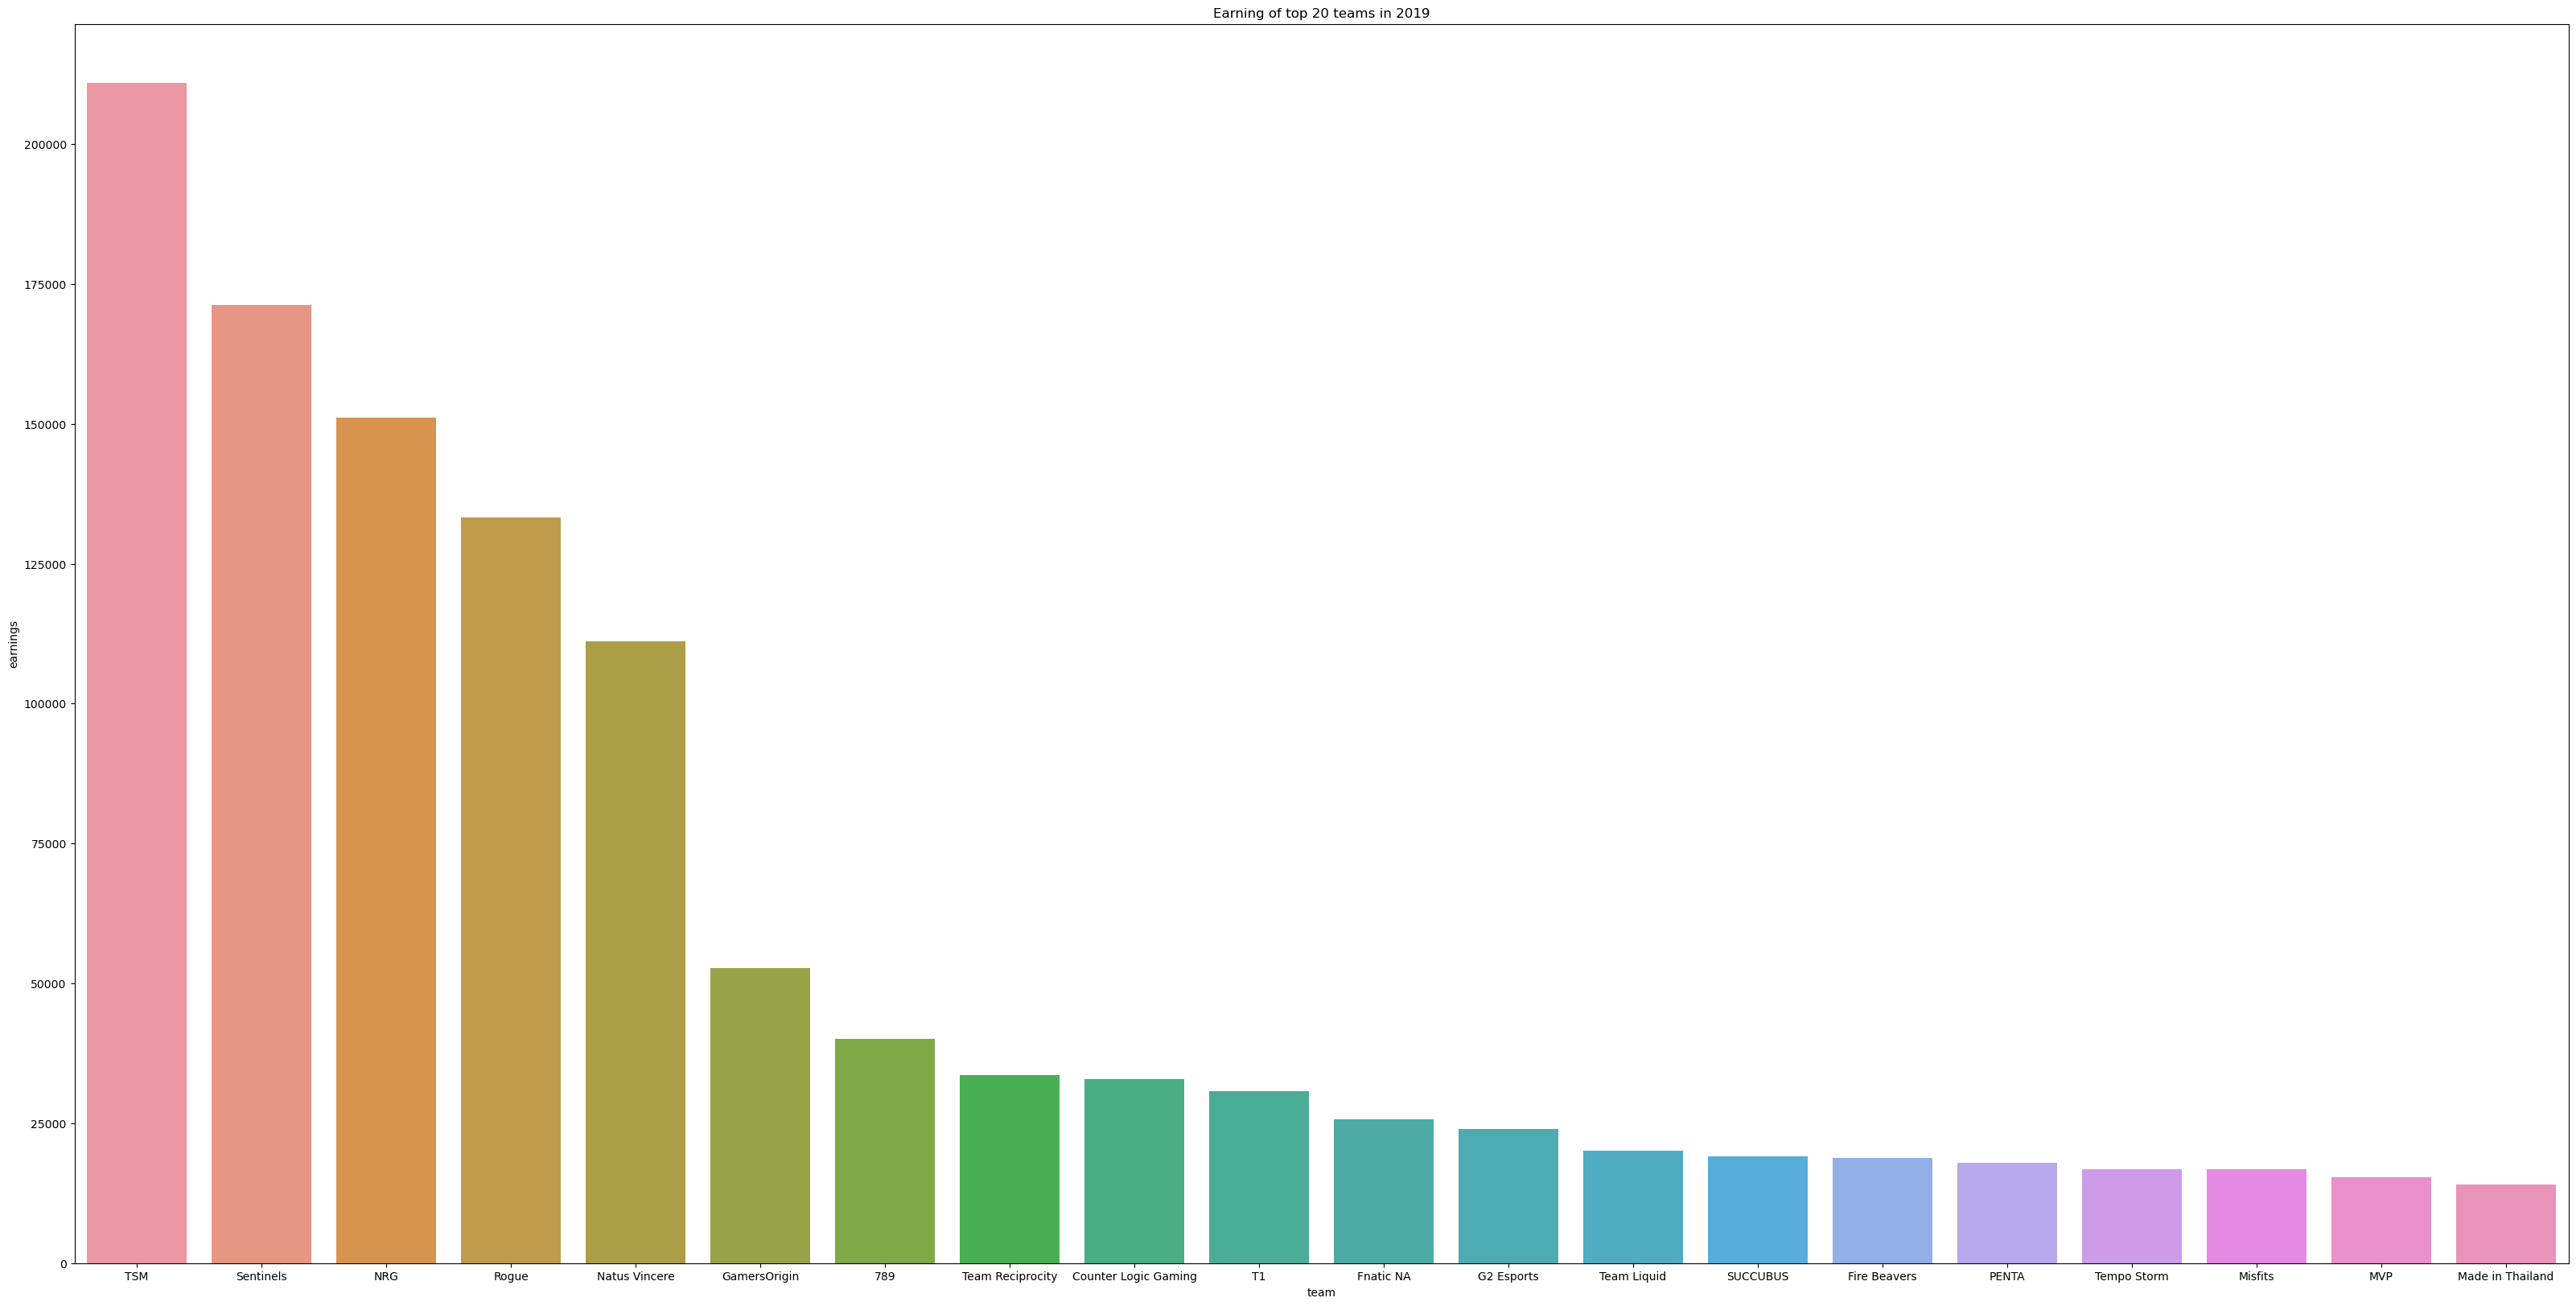

In [9]:
win2019_01 = win2019[win2019["earnings_rank"]<21]
win2019_f20 = sns.barplot(y=win2019_01["earnings"],x=win2019_01["team"])
win2019_f20.set(title="Earning of top 20 teams in 2019")
plt.gcf().set_size_inches(40, 20)

Ploting the top 20 team earnings in 2020

Even between the top 20 ranking range, the top 5 teams has a clear distance from other teams. There is a clear stair-like ~=$25000 distance between each team among the top 5 as well, which may refer to the ranking prize from the race holder.

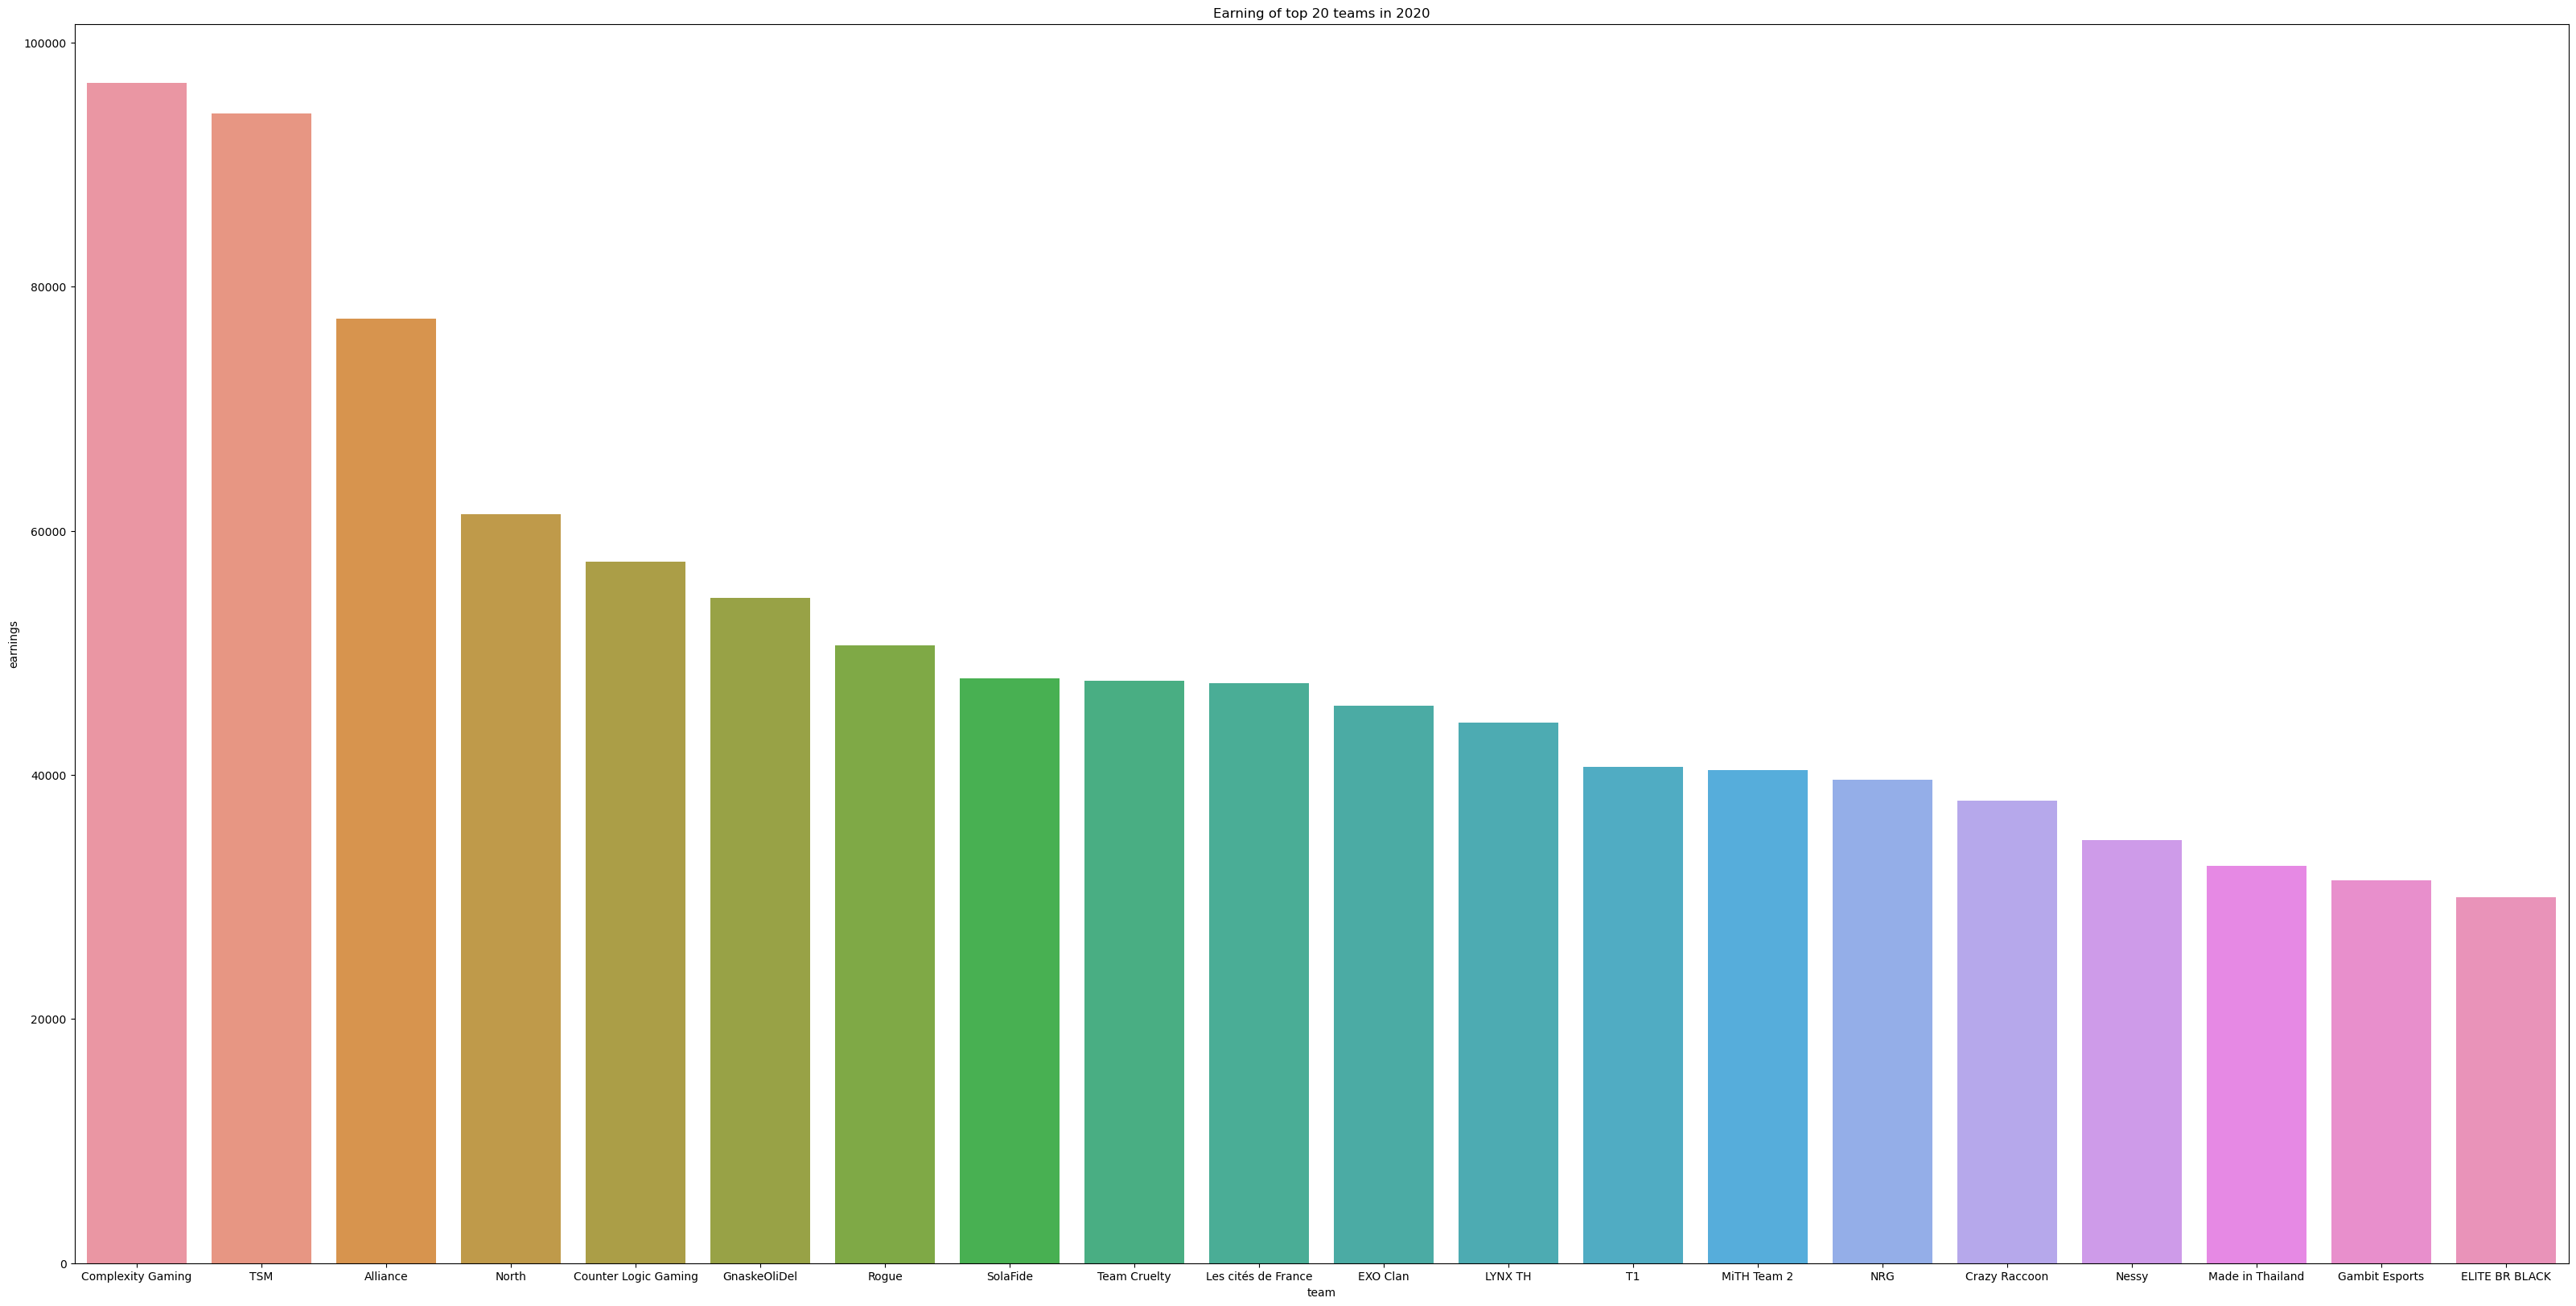

In [10]:
win2020_01 = win2020[win2020["earnings_rank"]<21]
win2020_f20 = sns.barplot(y=win2020_01["earnings"],x=win2020_01["team"])
win2020_f20.set(title="Earning of top 20 teams in 2020")
plt.gcf().set_size_inches(40, 20)

Comparing to the previous chart, the difference between each bar seems smaller but also the y value scale which is the earning amount is also decreased, this situation is caused by increase of teams joining the race. However, the top 3 teams are still clear to see that having more eanings than others.

Ploting the top 20 team earnings in 2021

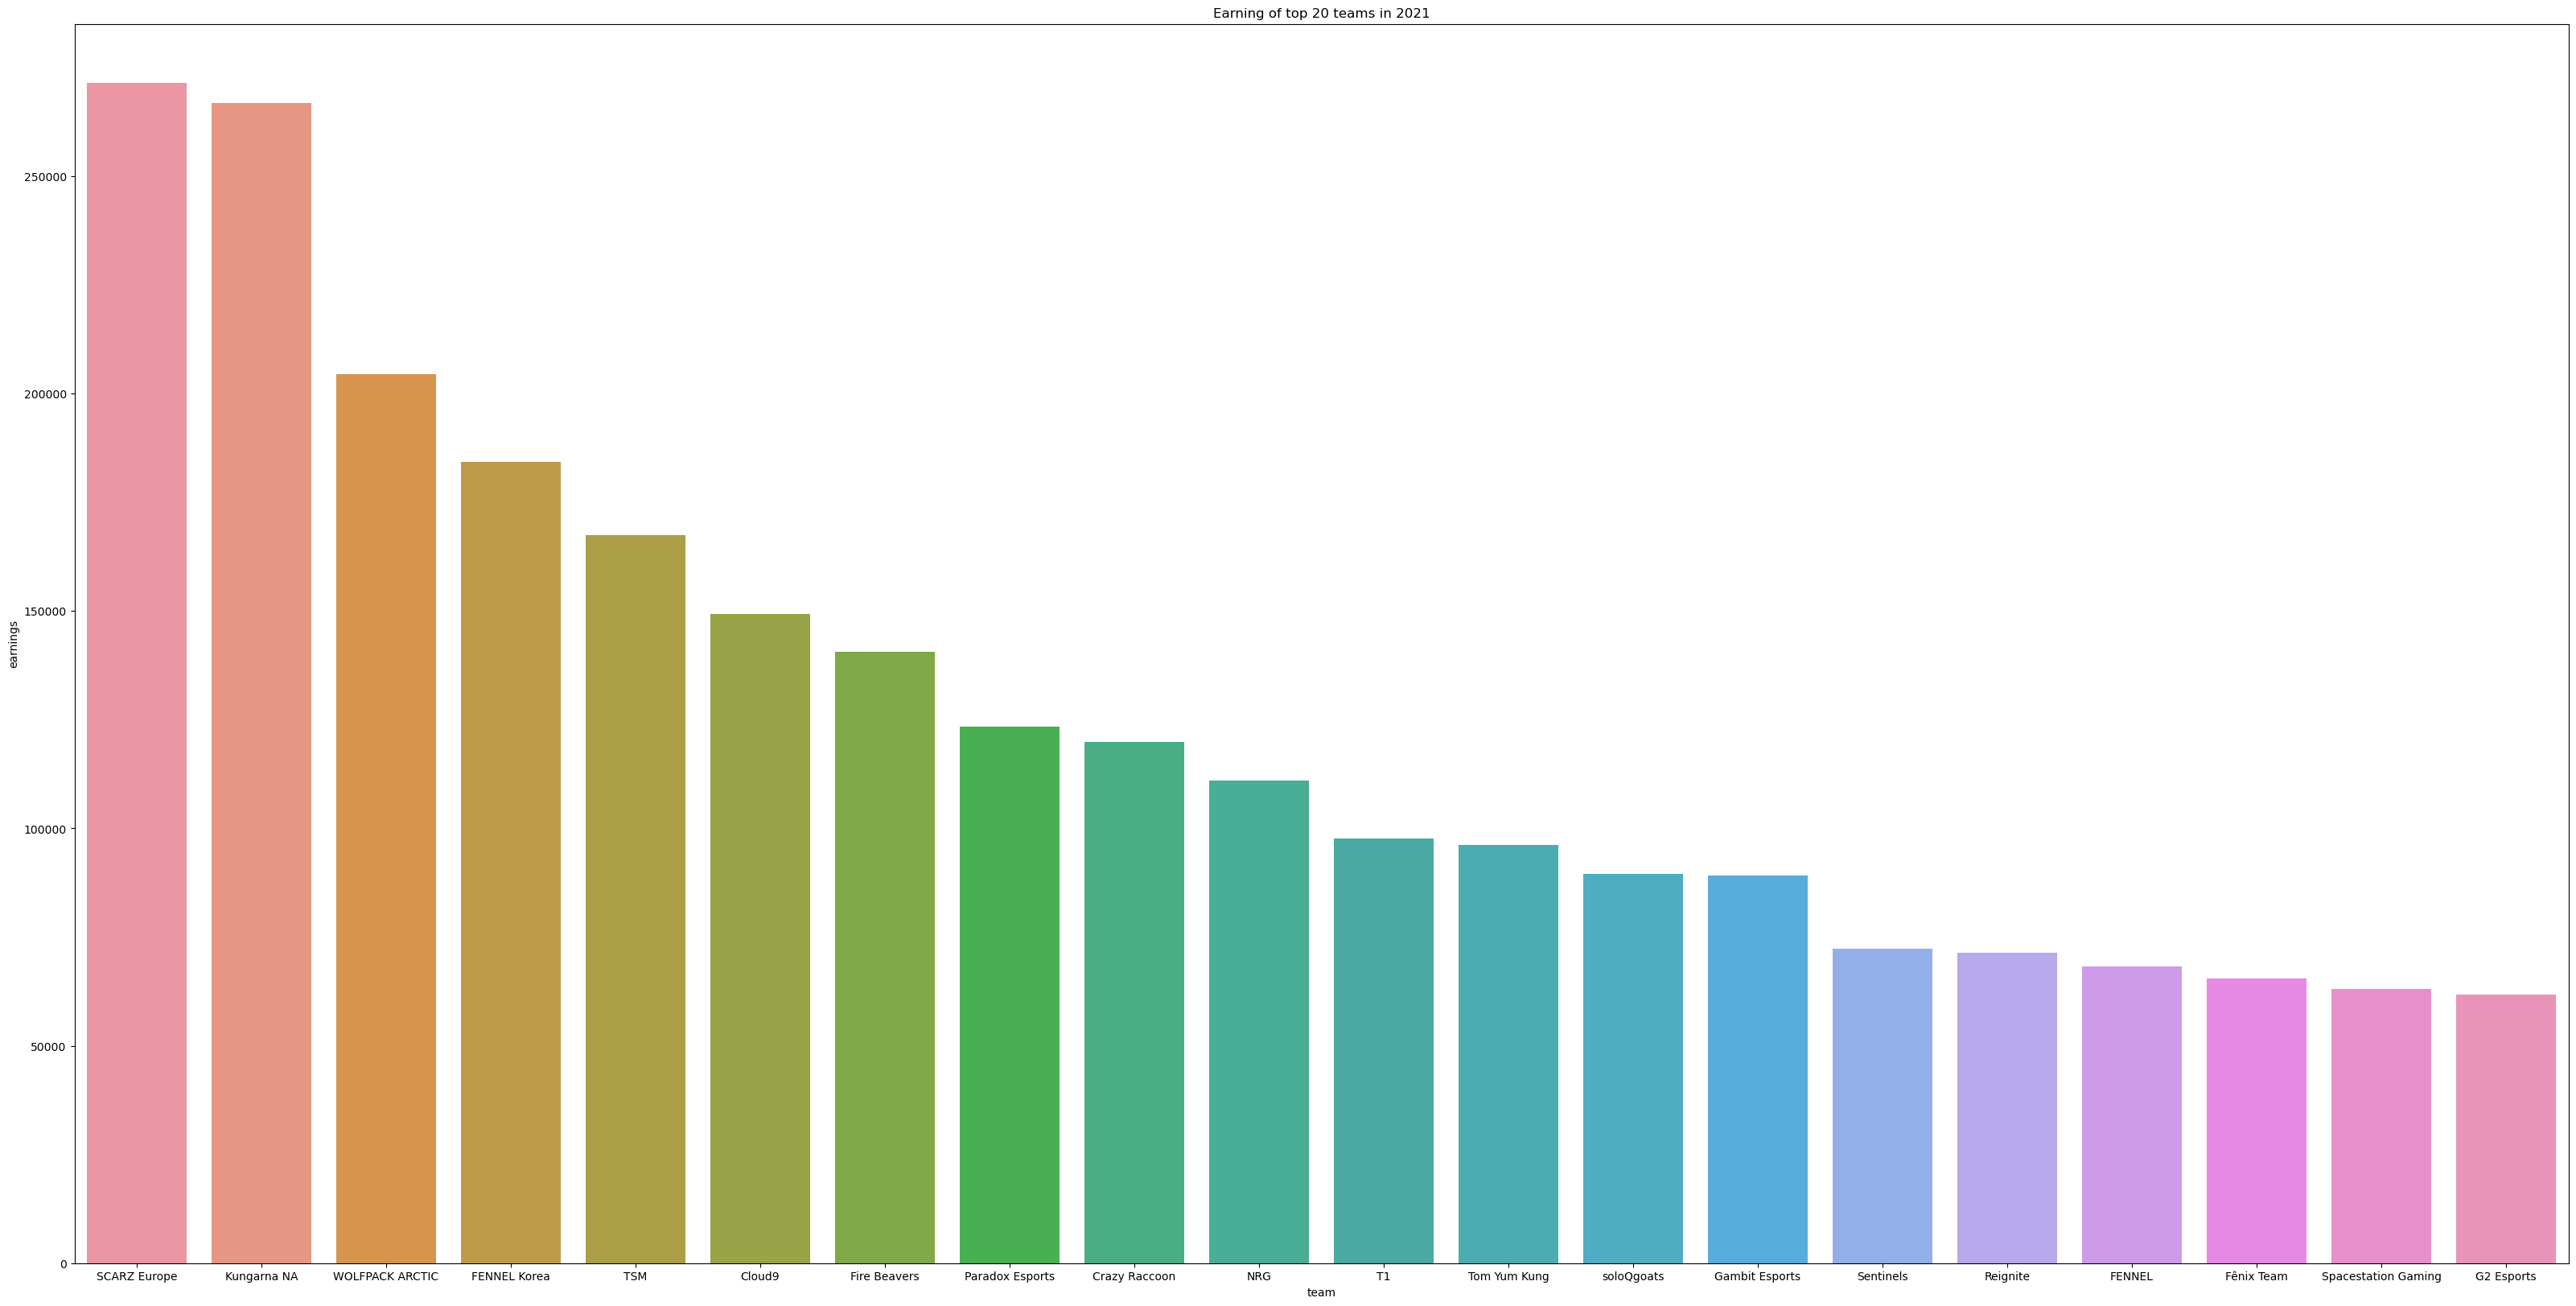

In [11]:
win2021_01 = win2021[win2021["earnings_rank"]<21]
win2021_f20 = sns.barplot(y=win2021_01["earnings"],x=win2021_01["team"])
win2021_f20.set(title="Earning of top 20 teams in 2021")
plt.gcf().set_size_inches(40, 20)

This year has the largest y value scale which means the prize pool is the largest since year 2019, it is suprising to see that the top 2 teams has a really close earning difference and have a really clear and huge difference with the 3rd rank. The top 20 ranks also shows a typical stair-like decreasing figure.

Ploting the top 20 team earnings in 2022

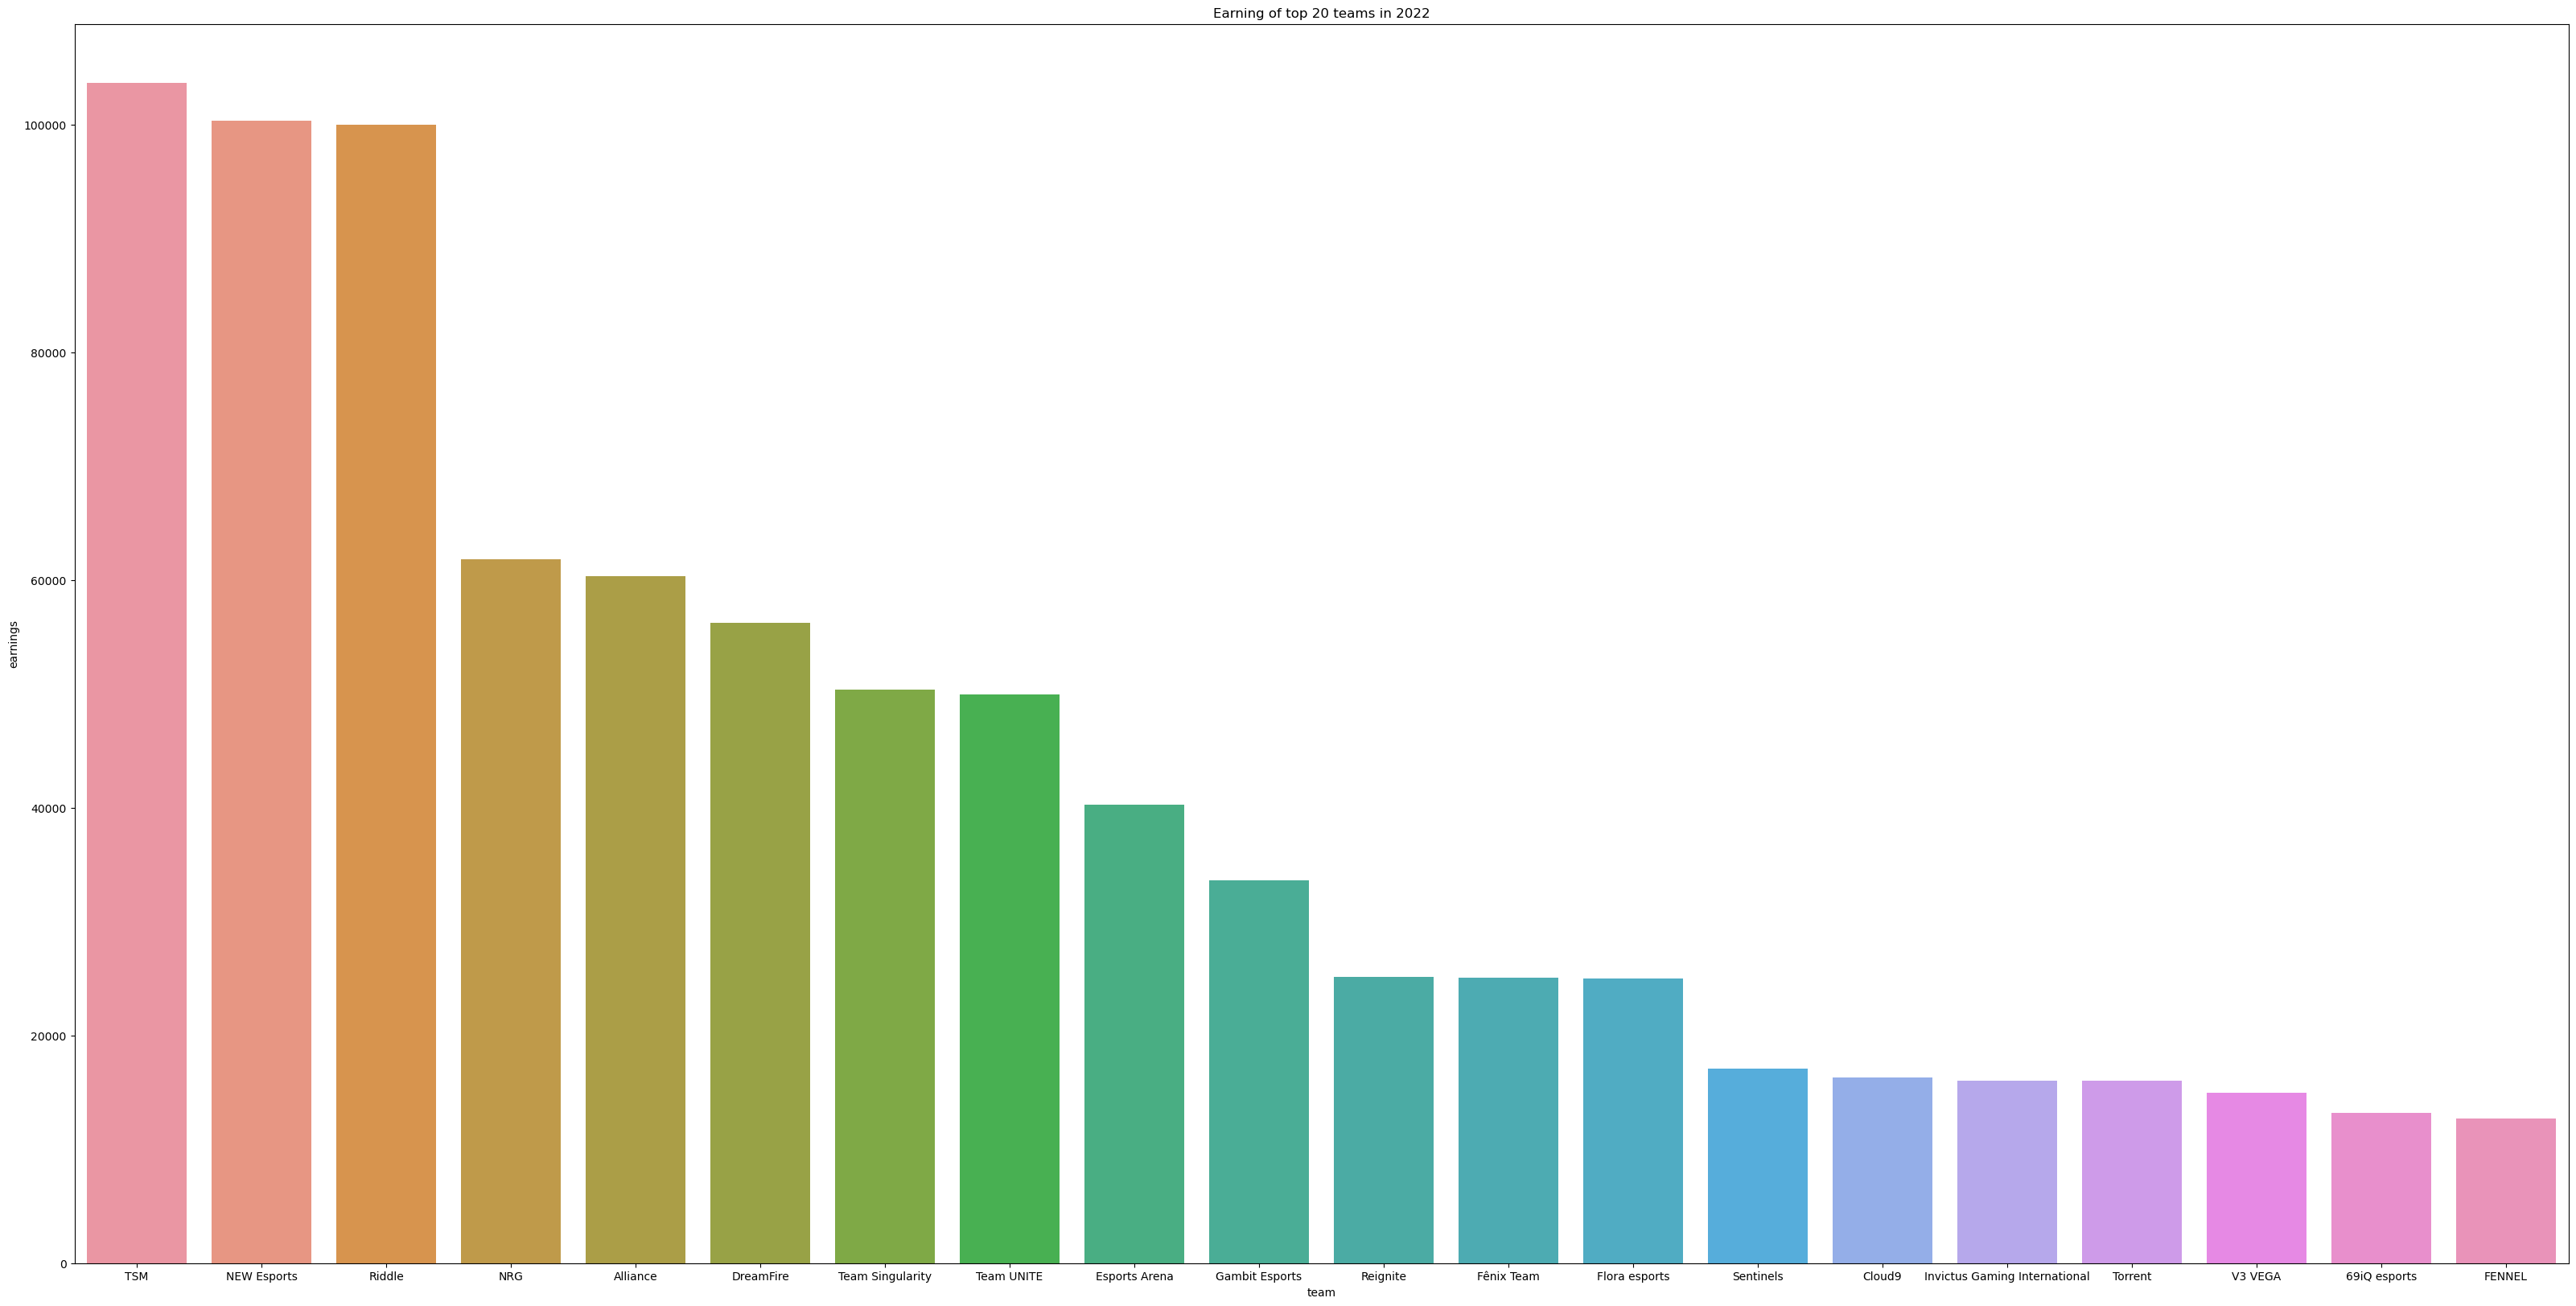

In [24]:
win2022_01 = win2022[win2022["earnings_rank"]<21]
win2022_f20 = sns.barplot(y=win2022_01["earnings"],x=win2022_01["team"])
win2022_f20.set(title="Earning of top 20 teams in 2022")
plt.gcf().set_size_inches(40, 20)

The prize pool shrinks a lot comparing to the previous year, and the top 3 teams, for the first time, has almost the same earnings. Similarly like previous years, the top 3 ranking has a clear distance from team ranking lower than 3.

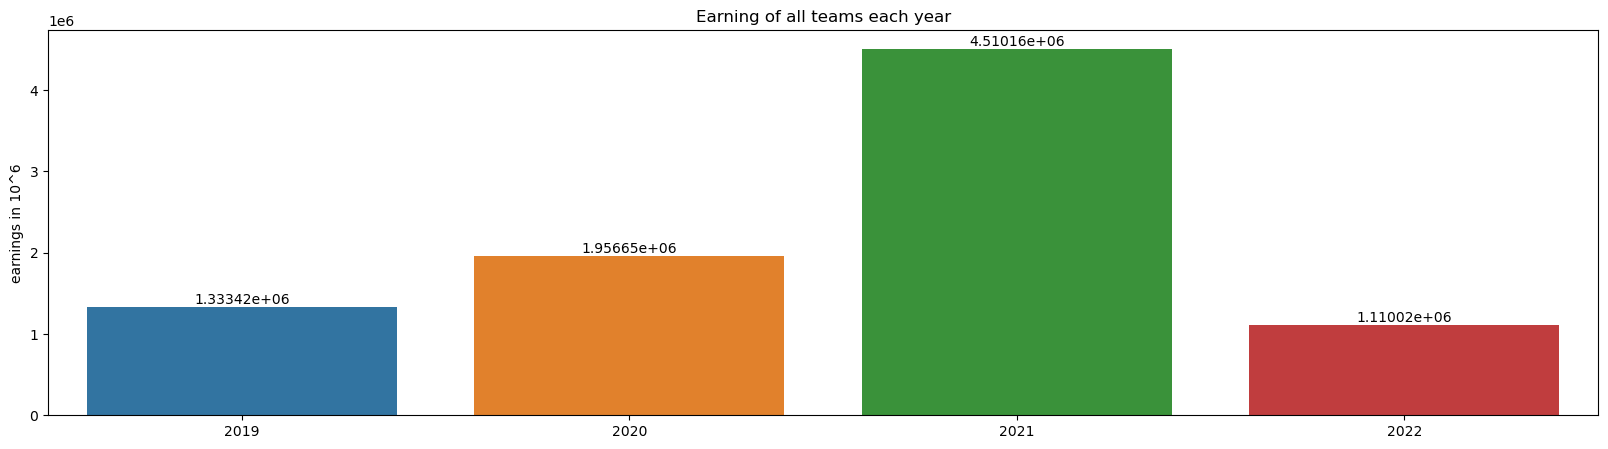

In [13]:
yearsum=[0,0,0,0]
for i in range(0,4):
    if i==0:
        for earnings in win2019["earnings"]:
            yearsum[i]+=earnings
    if i==1:
        for earnings in win2020["earnings"]:
            yearsum[i]+=earnings
    if i==2:
        for earnings in win2021["earnings"]:
            yearsum[i]+=earnings
    if i==3:
        for earnings in win2022["earnings"]:
            yearsum[i]+=earnings
year_earn_compare = {"year":[2019,2020,2021,2022],"total":yearsum}
year_comp = sns.barplot(x=year_earn_compare["year"],y=year_earn_compare["total"])
year_comp.set(title="Earning of all teams each year",ylabel="earnings in 10^6")
year_comp.bar_label(year_comp.containers[0])
plt.gcf().set_size_inches(20, 5)

It is clear to see that the total earning of all teams increases each year, it may refer to the amount of more teams joining the race and therefore causes more people focus on the race and more cash goes into the race prize pool. The 2021 prize pool is the largest but 2022 prize pool shrinks to only 1/4, this is probably also caused by less team join the race and also the international COVID pendamic.

# Task 2
Clean up data of player info, select columns that will be used for analysis only, drop off columns "real name" and "link"s

In [15]:
clean = player_info[["player_name","team","player_status"]]
player_info[["player_name","nationality","team","player_status"]]

,player_name,nationality,team,player_status
0,0waRy,Japan,TSURUGI eSports,Active
1,1000Eyes,United States,NaN,Active
2,1Fumeta,Brazil,NaN,Active
3,1ief,Australia,NaN,Active
4,1ndraking,Argentina,Pirate Dream Esports,Active
...,...,...,...,...
1268,zombs,United States,NaN,Retired
1269,Zonda,Taiwan,NaN,Retired
1270,ZOONINENINENINE,Argentina,NaN,Retired
1271,zSxlem,Saudi Arabia,NaN,Active


Take a look at the amount of plyers in each team

In [16]:
from IPython.display import display_html 
active = clean[clean["player_status"]=="Active"]
counting = active.groupby(by=["team"]).count()
counting

,player_name,player_status
team,,
100 Thieves,4,4
1907 Fenerbah?e Esports,1,1
25 Esports,1,1
69iQ eSports,5,5
789,3,3
...,...,...
grApe,1,1
nxblesse,1,1
smile,1,1


Showing team earning ranking by year

In [17]:
win2019head=win2019.head()
win2020head=win2020.head()
win2021head=win2021.head()
win2022head=win2022.head()
win2019_style = win2019head.style.set_table_attributes("style='display:inline; margin-right:0px;'").set_caption("Earning Raank 2019")
win2020_style = win2020head.style.set_table_attributes("style='display:inline; margin-right:0px;'").set_caption("Earning Raank 2020")
win2021_style = win2021head.style.set_table_attributes("style='display:inline; margin-right:0px;'").set_caption("Earning Raank 2021")
win2022_style = win2022head.style.set_table_attributes("style='display:inline'").set_caption("Earning Raank 2022")
display_html(win2019_style._repr_html_() + win2020_style._repr_html_()+ win2021_style._repr_html_()+ win2022_style._repr_html_(), raw=True)

,earnings_rank,team,earnings,year
0,1,TSM,210917,2019
1,2,Sentinels,171194,2019
2,3,NRG,151158,2019
3,4,Rogue,133252,2019
4,5,Natus Vincere,111177,2019
,earnings_rank,team,earnings,year
111,1,Complexity Gaming,96700,2020
112,2,TSM,94195,2020
113,3,Alliance,77375,2020
114,4,North,61340,2020


# Task 3 Method Chaining

Display of first 10 Players in list and their status


,player_name,nationality,player_status
0,0waRy,Japan,Active
1,1000Eyes,United States,Active
2,1Fumeta,Brazil,Active
3,1ief,Australia,Active
4,1ndraking,Argentina,Active
,player_name,nationality,player_status
15,836,Japan,Retired
21,aceu,United States,Retired
23,Aeon,Belgium,Retired
24,Aesir,Japan,Retired


Display of top 20 earnings in 2019


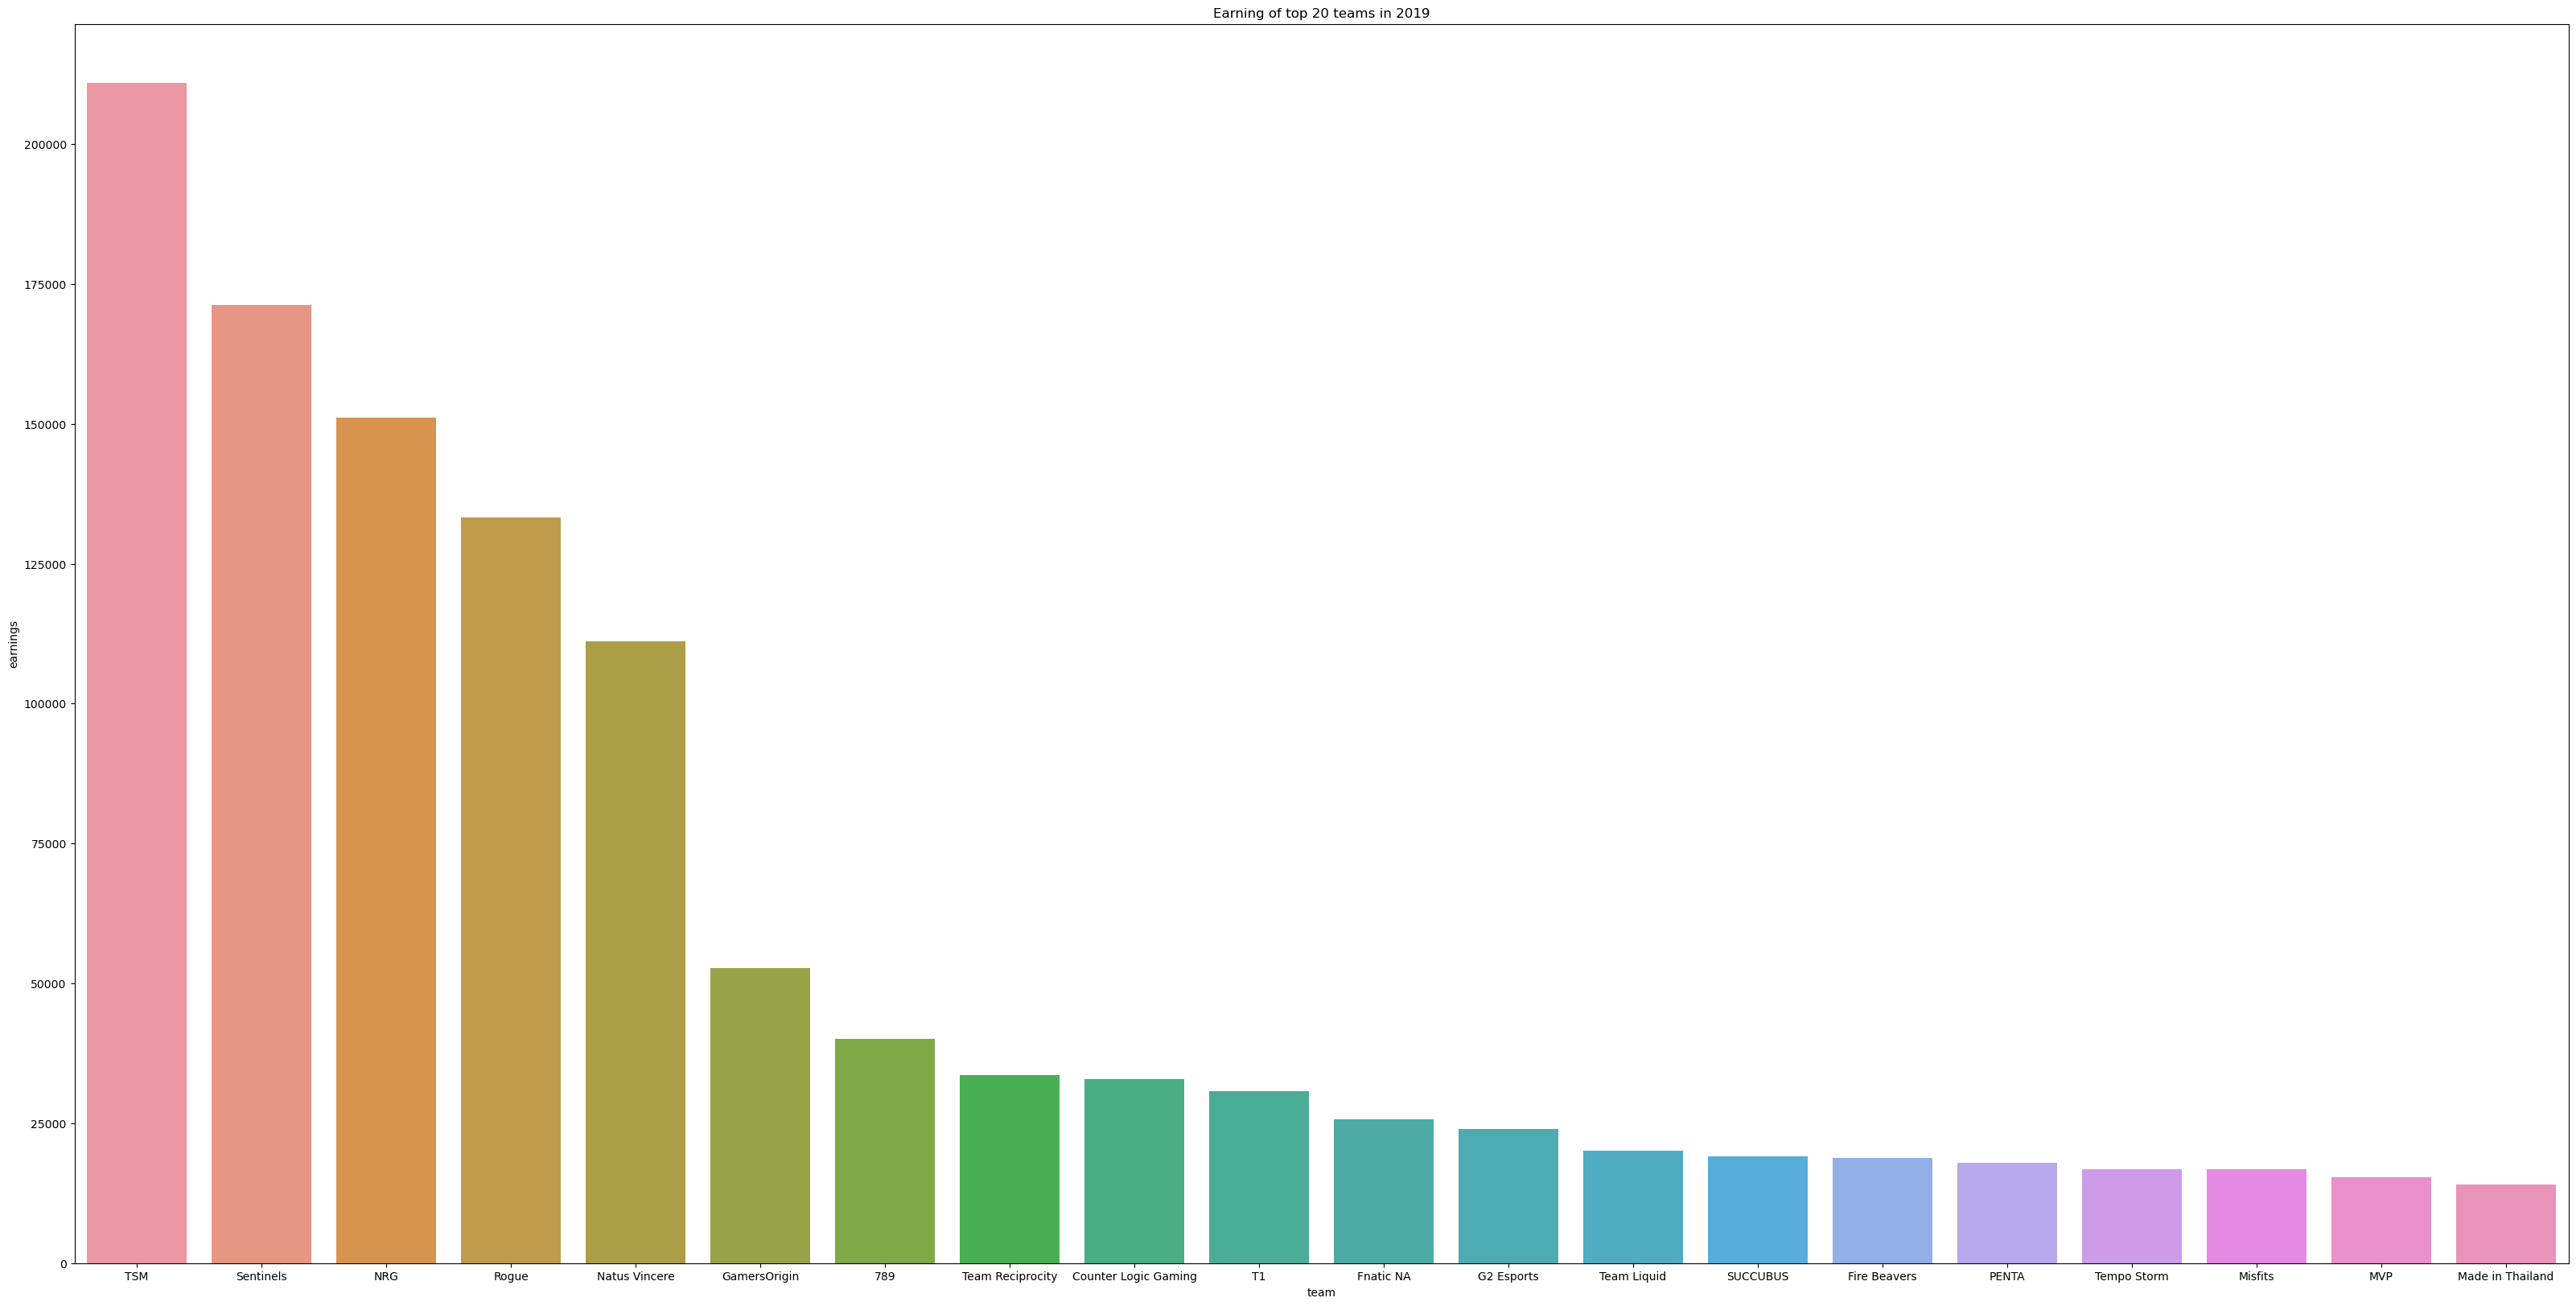

Display of top 20 earnings in 2020


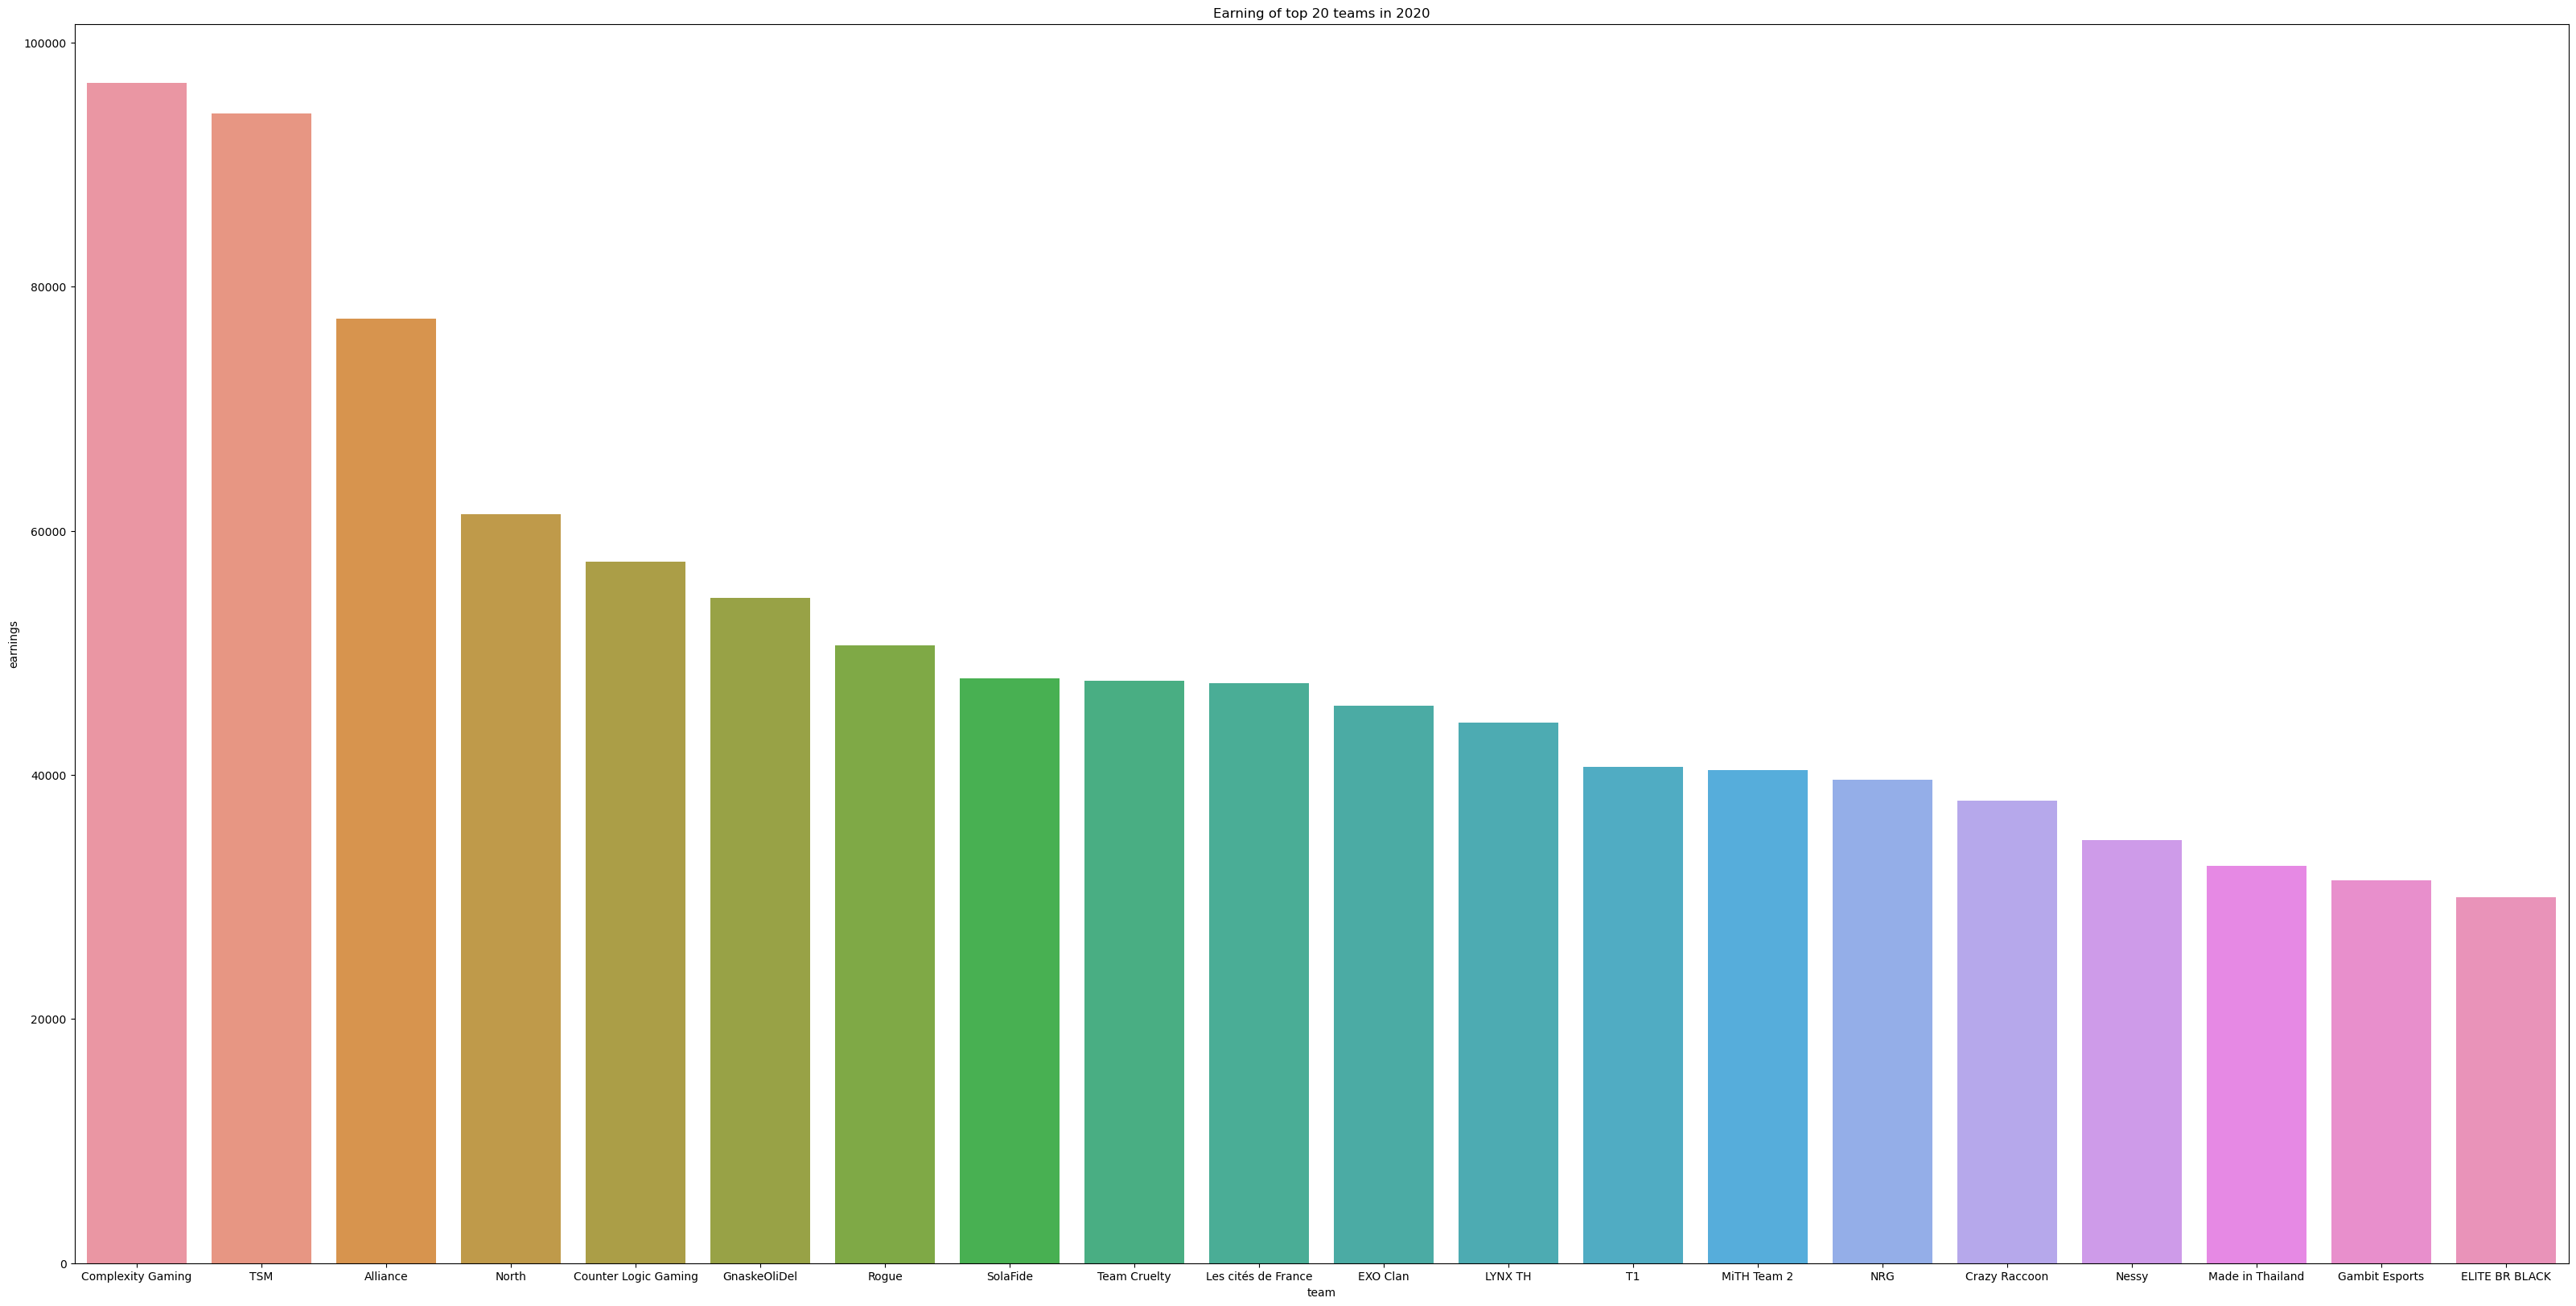

Display of top 20 earnings in 2021


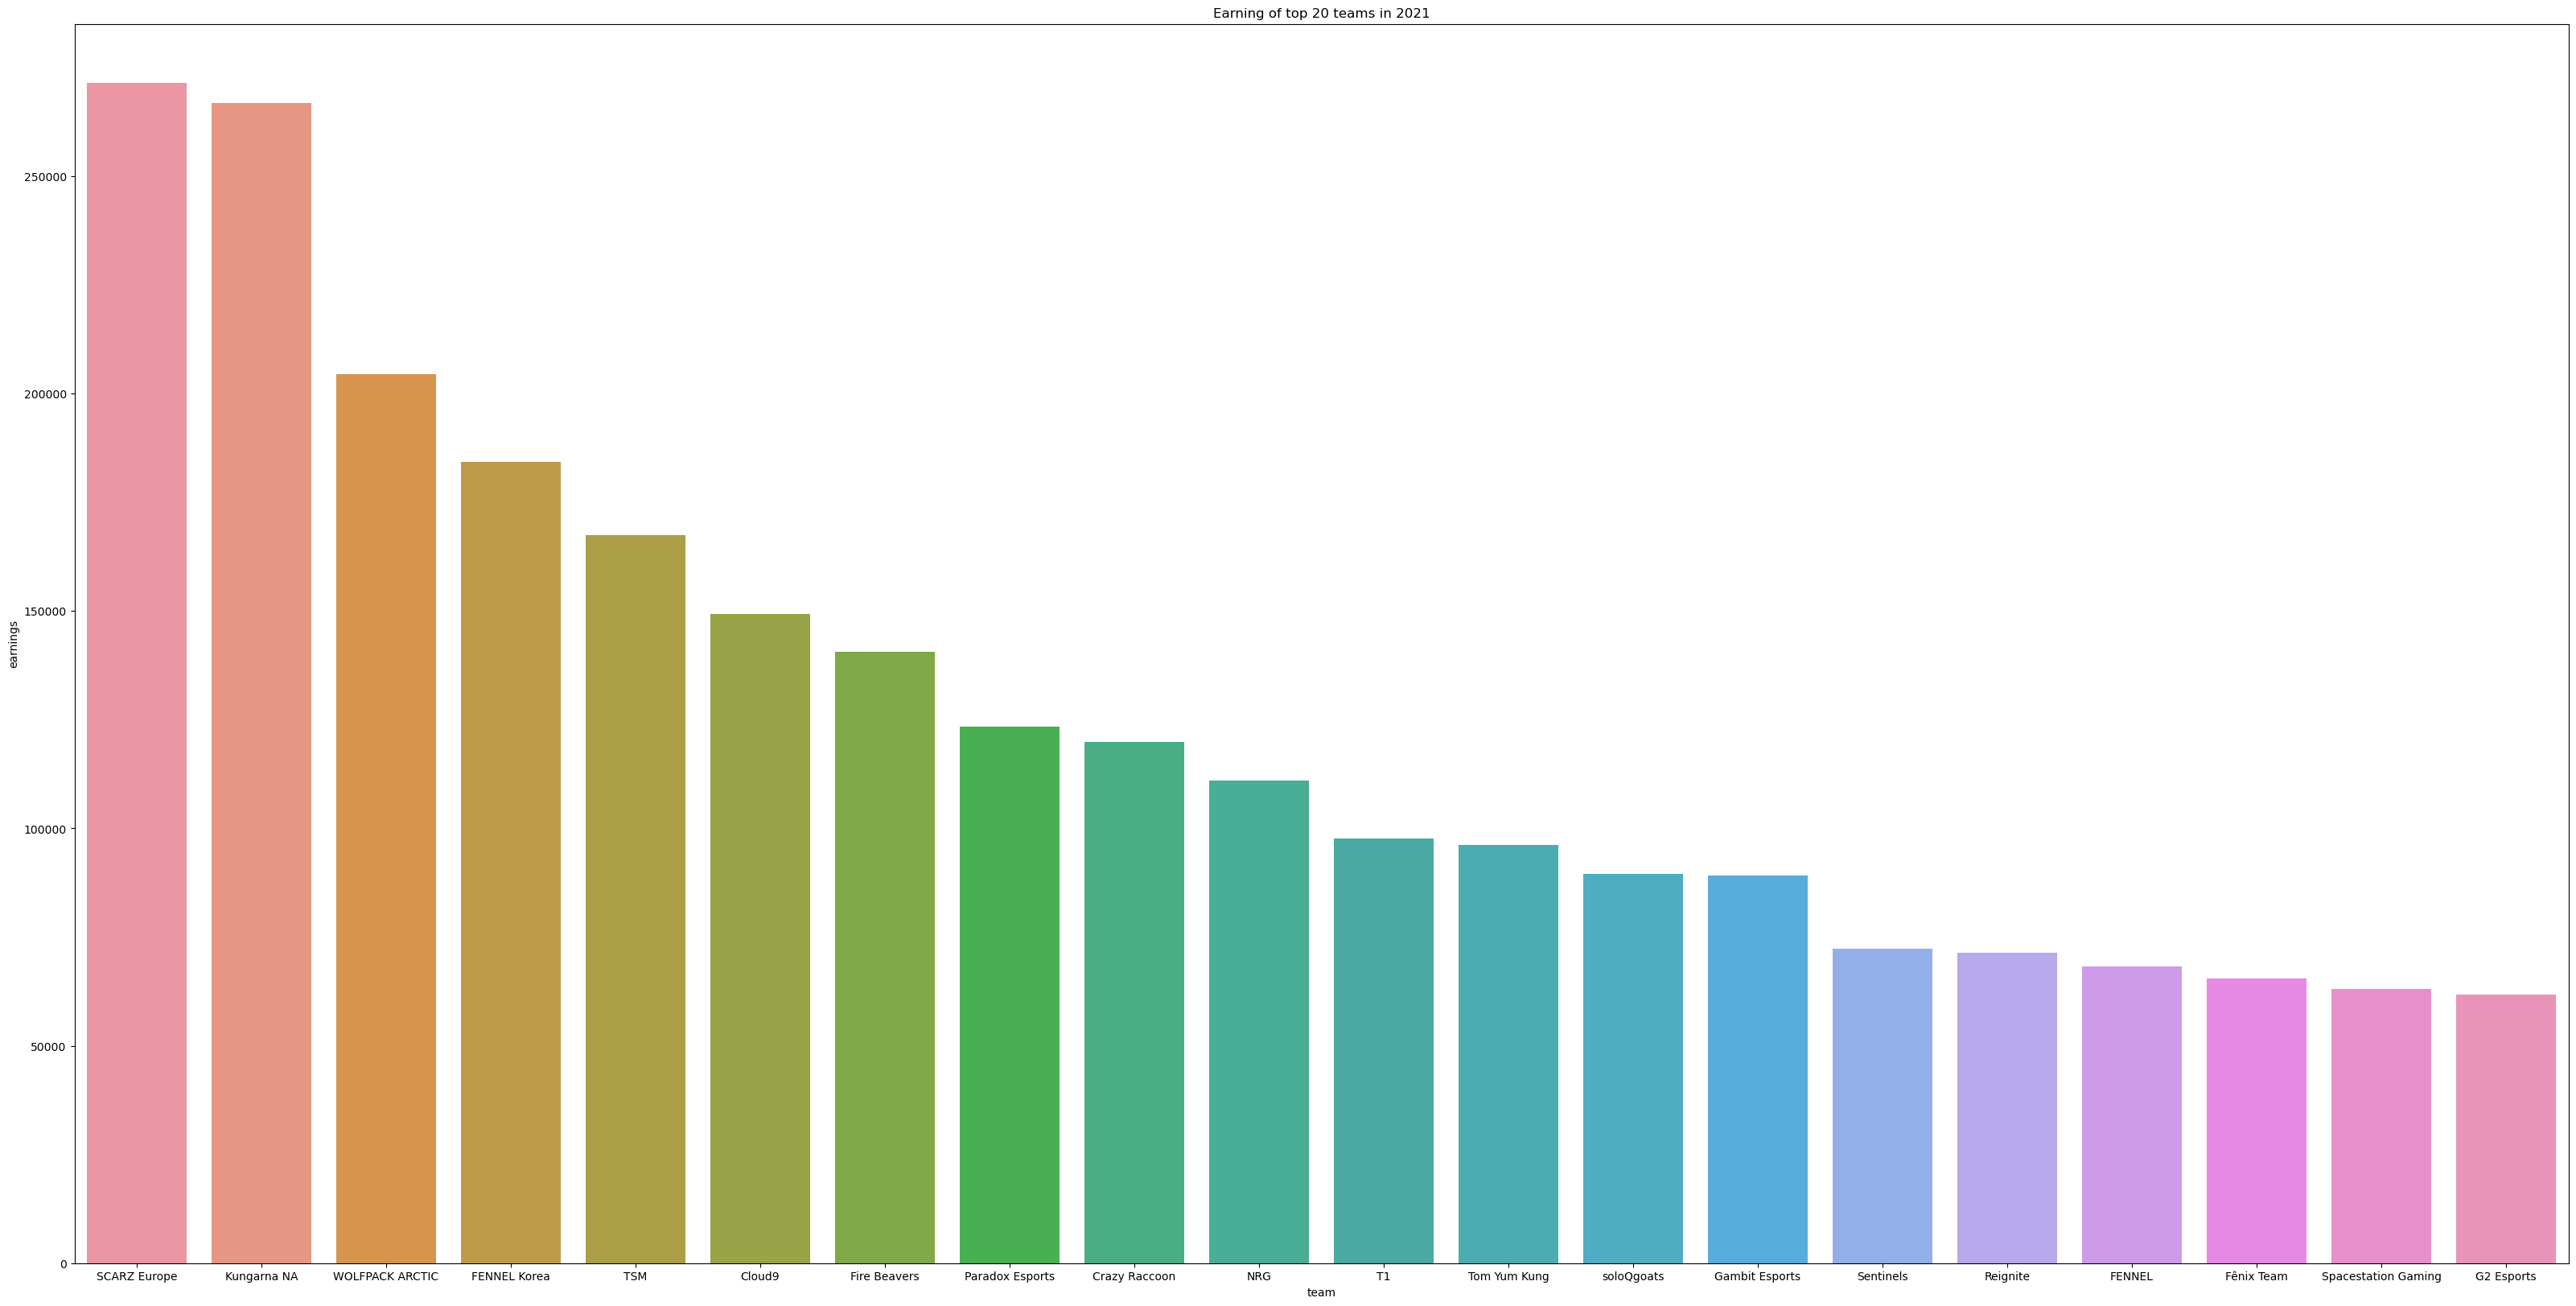

Display of top 20 earnings in 2022


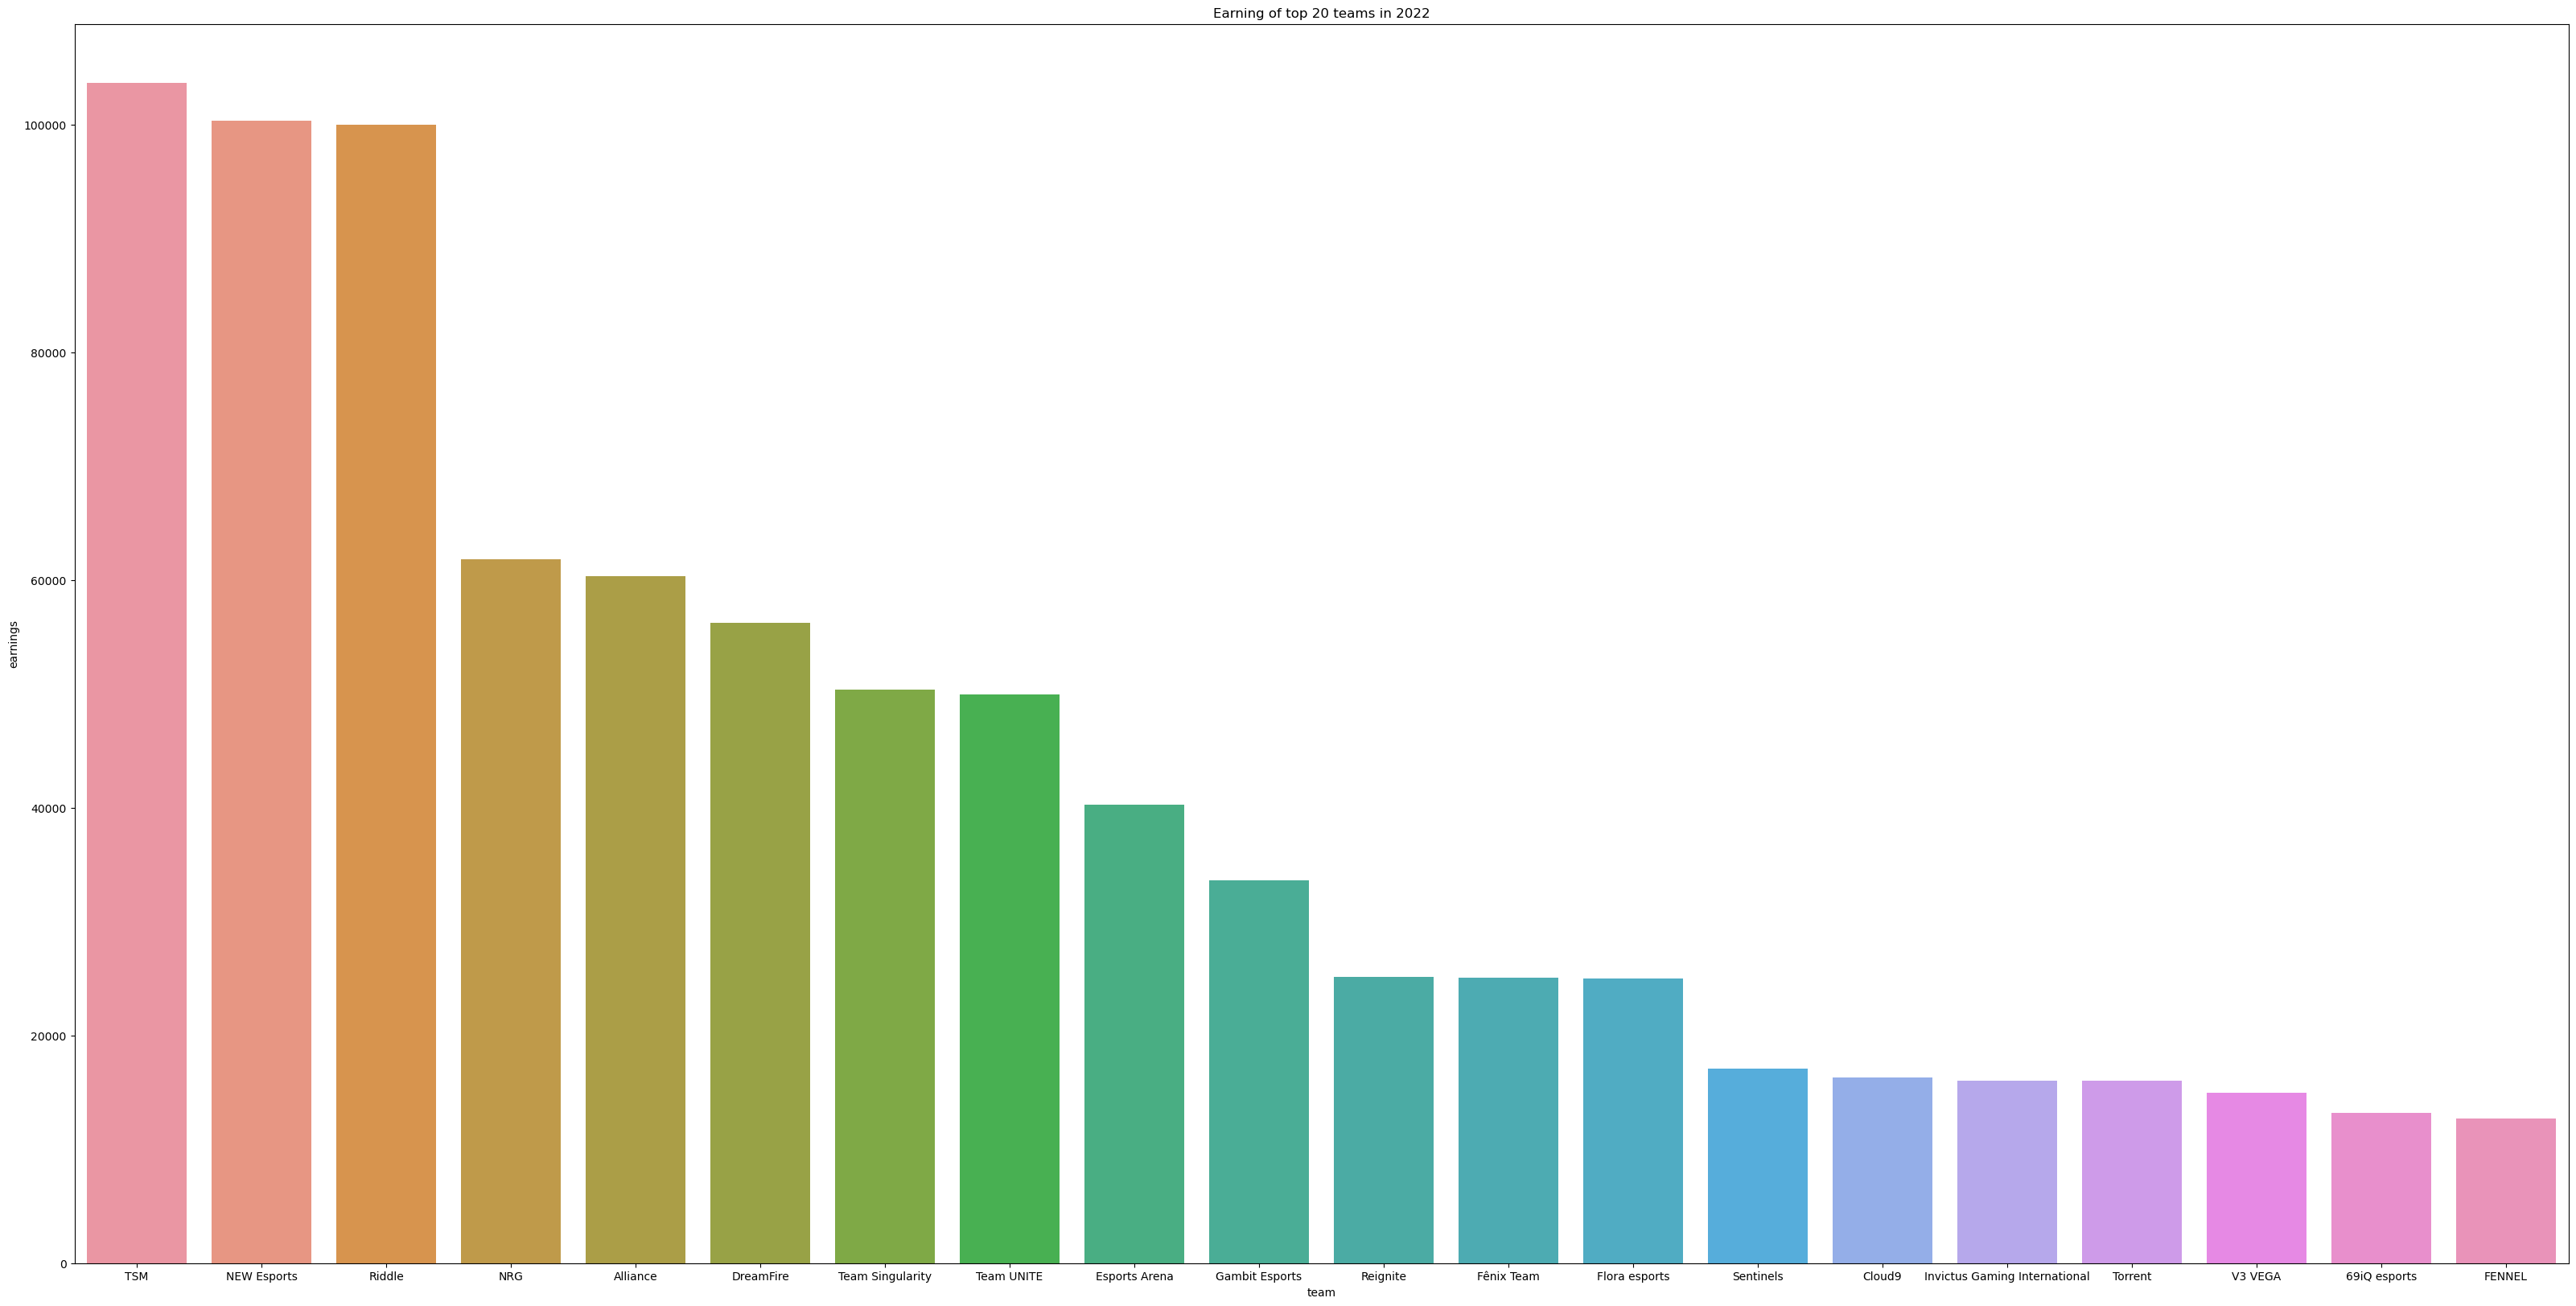

Display of total year earning compare


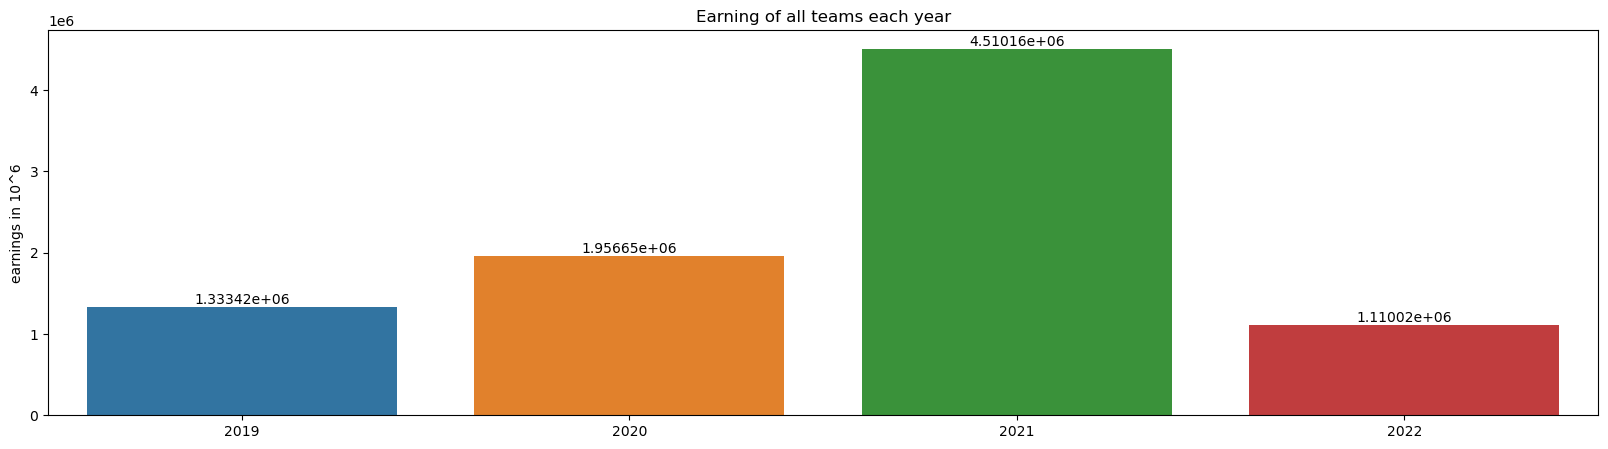

Display of top 5 teams' ranking by year


,earnings_rank,team,earnings,year
0,1,TSM,210917,2019
1,2,Sentinels,171194,2019
2,3,NRG,151158,2019
3,4,Rogue,133252,2019
4,5,Natus Vincere,111177,2019
,earnings_rank,team,earnings,year
111,1,Complexity Gaming,96700,2020
112,2,TSM,94195,2020
113,3,Alliance,77375,2020
114,4,North,61340,2020


In [18]:
import A1MC as gb
gb.start("ungraded/--playerinfo.csv","ungraded/winnings_by_org_allYears.csv")

# Task 4 Data Analysis

(Analysis and conclusion for this analysis part only)

The genarl relation between each year's prize pool is highly connected with the amount of teams that joins the race that year, some other factors are some real world events that influences the amount of teams join the race and indirectly applying impact on the prize pool.

The 2019 top 3 ranking teams are team 1)TSM, 2)Sentinels and 3)NRG

2019-2022 rankings of the 3 team

TSM      : 1st, 2nd,  5th,  1st 

Sentinels: 2nd, 20th, 15th, 14th

NRG      : 3rd, 15th, 10th, 4th

It is clear that both the 2nd and 3rd ranking team of the first year failed to keep their position in the top 10 in the second year's race, this is obviously because of the increase of teams joining into this e-sport race and the competition increased. Similarly, the top 3 teams of each  year is always changing and only the team TSM keeps staying in the top 5 ranking. On the other hand, TSM is also the team has the most active player in the year 2022, it might can be said that there is a connection between its high ranking and the amount of players it has.